# K Means Clustering Project

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [ ]:
#KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1.import data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Programming Machine/K-Mean/college_data.csv')
data = data.drop('Unnamed: 0', axis =1)
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# 2.Data Preparations

## 2.1 หาจำนวน column

In [ ]:
data.keys()

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [ ]:
#หาจำนวน class ของตัวแปรที่จำต้องแบ่งกลุ่ม
data['Private'].unique()

array(['Yes', 'No'], dtype=object)

## 2.2 ทำ label encoder ของfeature ที่เป็น category

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['cluster'] = labelencoder.fit_transform(data['Private'])
data = data.drop(['Private'], axis = 1)
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
 17  cluster      777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


plot graph เพื่อดูการแจกแจงหรือการกระจาย ของแต่ละตัวแปร

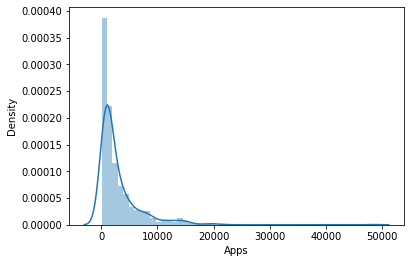

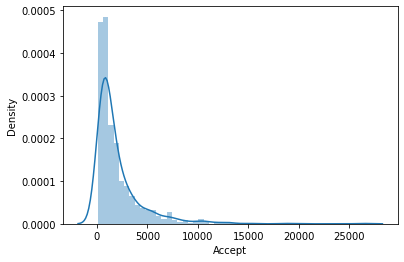

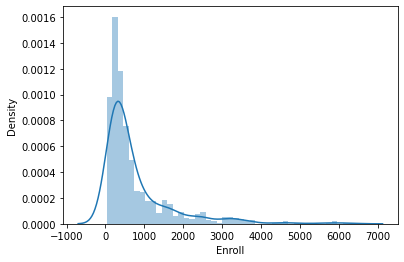

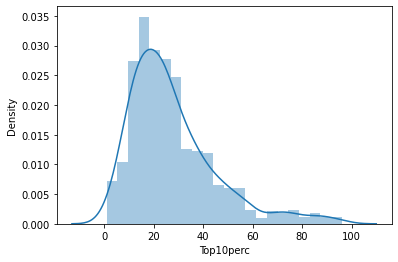

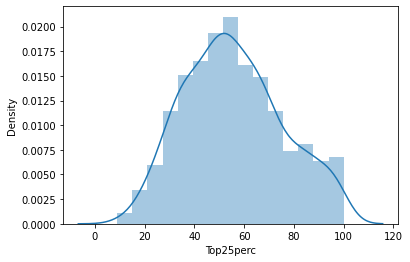

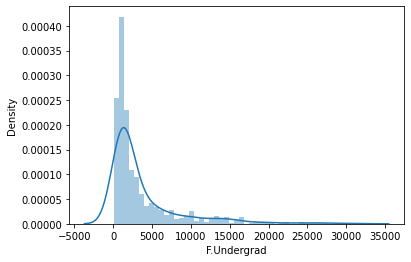

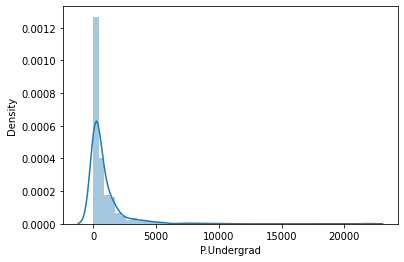

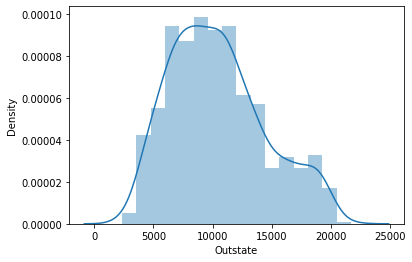

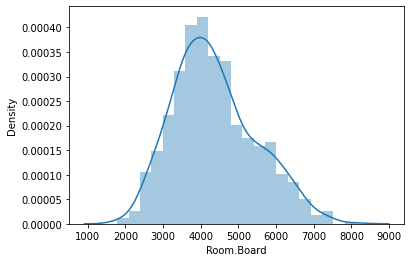

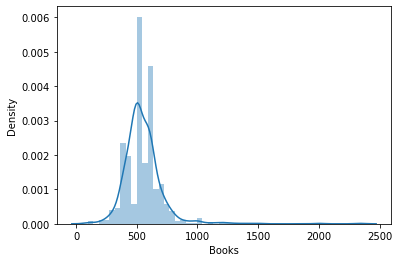

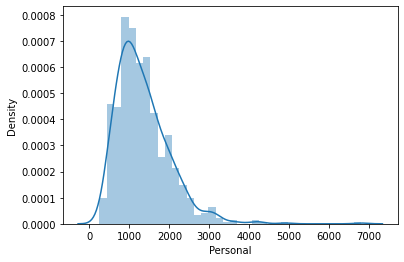

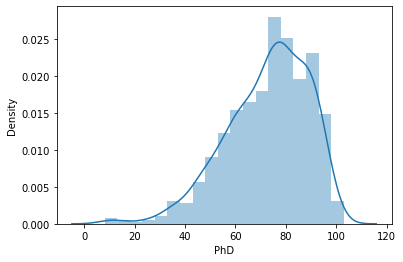

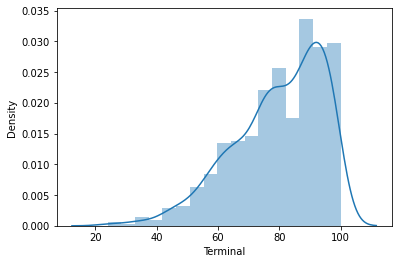

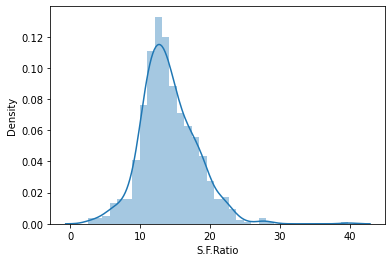

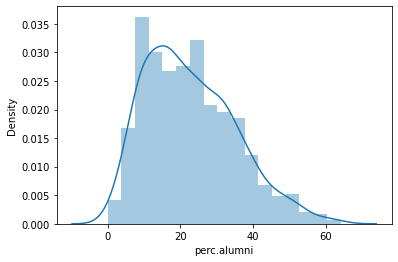

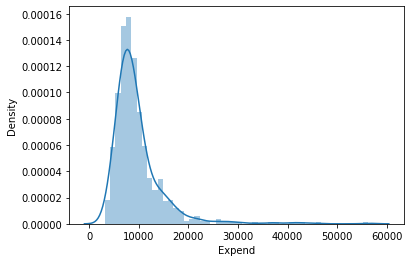

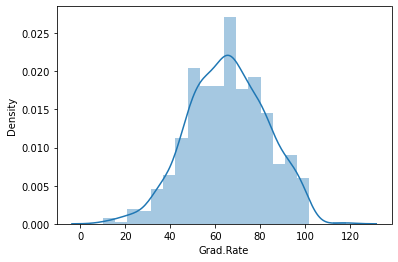

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col])
    
plt.show()

## 2.3 หา Correlation ระหว่างตัวแปรต้น

In [ ]:
# หาค่า correlation จาก pairplot
sns.pairplot(data)

 ขั้นตอนนี้จะทำการหาค่า correlation เพื่อเป็นการดูทิศทางความสัมพันธ์ระหว่างตัวแปร 2 ตัว โดยมี Correlation Coefficient (r) หรือ ค่าสัมประสิทธิ์สหสัมพันธ์ เป็นตัวบ่งชี้ถึงความสัมพันธ์นี้ ซึ่งค่าสัมประสิทธิ์สหสัมพันธ์นี้จะมีค่าอยู่ระหว่าง -1.0 ถึง +1.0 ซึ่งหากมีค่าใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันโดยตรงอย่างมาก และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน

จากนั้นจะพิจารณาค่าของ correlation ว่าควรที่จะทำ PCA หรือไม่ หากข้อมูลมี correlation กันเยอะก็ควรจะทำ PCA

In [ ]:
data.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755,-0.432095
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313,-0.475252
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341,-0.567908
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989,0.164132
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281,0.095752
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773,-0.615561
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001,-0.452088
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290,0.552650
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942,0.340532
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061,-0.018549


จากกราฟพบว่าข้อมูล มีหลายตัวแปรที่มีค่า relation กัน

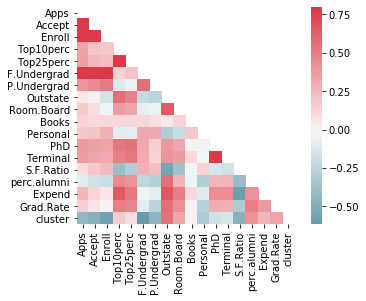

In [ ]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(),mask=mask,  cmap=cmap, vmax=.8, center=0,
            square=True)

In [ ]:
# normalize data method1
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

# data_std = pd.DataFrame(MinMaxScaler().fit_transform(data[data.columns[:]]))
# data_std.head(5)

# 3.Methodology

# แบบที่ 1 ทำ PCA 

## 1. ทำ PCA เพื่อลดจำนวนของ Dimension

จริงๆทั้ง 2 วิธีเป็นเทคนิคในการทำ dimension reduction ประเภท Feature Extraction เหมือนกันทำให้เราได้ จำนวนตัวแปรใหม่ที่มีขนาดลดลง แต่สิ่งที่แตกต่างกัน คือ PCA เป็นการสร้าง component ใหม่ โดยการหา linear combination จากตัวแปรตั้งต้น เพื่ออธิบาย information ให้ได้มากที่สุด 

มาดู Principal Components Analysis (PCA) กันก่อน
จุดประสงค์ในการทำ PCA
แก้ปัญหา high-dimensional data ข้อมูลที่มีจำนวนตัวแปร เยอะกว่าจำนวนตัวอย่าง (n น้อยกว่า p) จะเจอปัญหานี้เยอะในงานพวก image processing งานวิเคราะห์ทางการแพทย์ เช่น วิเคราะห์ Gene Expression ของผู้ป่วยโรคมะเร็ง
เพื่อลดจำนวนของตัวแปรลง โดยที่ไม่อยากจะตัดตัวแปรที่เราได้ทิ้ง (ไม่อยากจะเสีย information) แต่อาจจะทำให้อธิบายหรือตีความผลการวิเคราะห์ได้ยากขึ้นหน่อยนึง
ลดปัญหาตัวแปรมีความสัมพันธ์กัน (Multicollinearity) เพราะ component แต่ละตัวจะไม่มีความสัมพันธ์กัน
PCA จะทำการสร้างตัวแปรขึ้นมาใหม่เรียกว่า component โดยแต่ละ component จะไม่มีความสัมพันธ์กัน โดย component ตัวแรกจะมีค่า variance สูงที่สุด ซึ่งจะอธิบาย information ได้มากที่สุด และตัวถัดๆ ไปก็จะมี variance ลดหลั่นกันไปตามลำดับ โดยปกติจำนวน component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90%

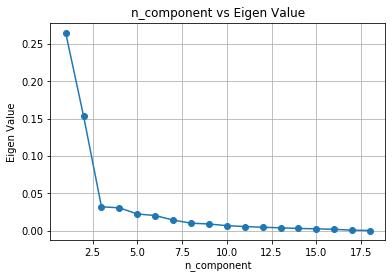

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

preprocess_pipe = make_pipeline(MinMaxScaler(), PCA())
preprocess_pipe.fit(data)
eigen_value = preprocess_pipe.named_steps['pca'].explained_variance_
plt.title('n_component vs Eigen Value')
plt.xlabel('n_component')
plt.ylabel('Eigen Value')
plt.grid()
plt.plot(np.arange(1,len(eigen_value)+1), eigen_value, '-o')
plt.show() 

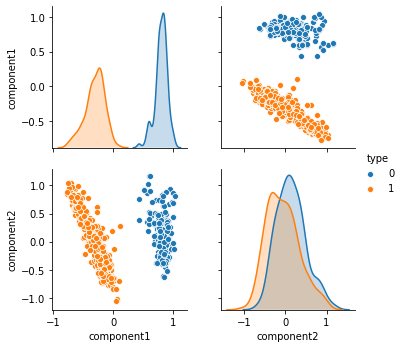

In [ ]:
data_transform = preprocess_pipe.set_params(pca__n_components=2).fit_transform(data)
df = pd.DataFrame(data_transform, columns = ['component{}'.format(i) for i in [1,2]])
df.head()
df['type'] = data['cluster']
sns.pairplot(df,hue='type', vars = ['component{}'.format(i) for i in [1,2]])

Silhouette เป็นเทคนิคที่ใช้วัดว่า Instance นั้นมีความเหมือนกับ Cluster ที่มันอยู่มากเพียงใด เมื่อเทียบกับ Cluster อื่นๆ ค่าของ Silhouette อยู่ในช่วง -1 ถึง 1 ยิ่งมีค่ามากแสดงว่า Instance มีความคล้ายกับ cluster ของมันมากและมีความคล้ายกับ Cluster อื่นน้อย
Silhouette สามารถใช้ Distance metric อย่างเช่น Euclidean, Manhattan distance มาช่วยเพื่อวัดระยะ
หากต้องการจัดกลุ่ม Instancesด้วยเทคนิค K-means โดยต้องการจัดกลุ่มจำนวน k กลุ่ม, ในแต่ละรอบของ Instance ที่ i, ให้ a(i) เป็นค่าเฉลี่ยความต่าง (Dissimilarity) ที่ i กับทุก Instances ใน Cluster เดียวกัน เพื่อคำนวณค่า a(i) นั้นดีมากน้อยเพียงใดเมื่อ i ถูกกำหนดให้กับ Cluster ของมัน (ค่ายิ่งน้อยยิ่งดี) โดยค่าเฉลี่ยของความต่างจากจุด i ไปยัง Cluster c นั้นจะเป็นค่าเฉลี่ยของระยะทางจาก i ไปยังทุกจุดใน c

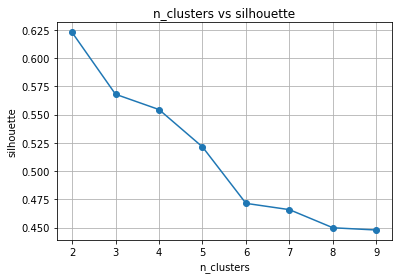

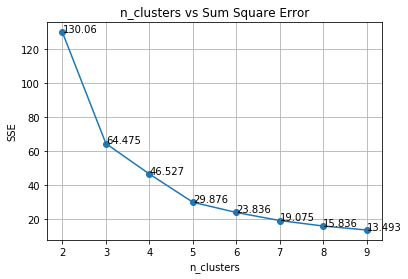

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score

range_n_clusters = np.arange(2,10)
silhouette = []
sse = []
cluster_center = {}

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    clusterer = clusterer.fit(data_transform)
    silhouette.append(silhouette_score(data_transform, clusterer.predict(data_transform)))
    sse.append(clusterer.inertia_)
    cluster_center.update({'{}'.format(n_clusters):clusterer.cluster_centers_})
    
#plt.subplot(1, 2, 1)
plt.title('n_clusters vs silhouette')
plt.xlabel('n_clusters')
plt.ylabel('silhouette')
plt.grid()
plt.plot(range_n_clusters, silhouette, '-o')
plt.show() 
    
#plt.subplot(1, 2, 2)
plt.title('n_clusters vs Sum Square Error')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.grid()
plt.plot(range_n_clusters, sse, '-o')
for xy in zip(range_n_clusters, sse):
    plt.annotate('{:.5}'.format(xy[1]), textcoords='data', xy = xy)
plt.show()

จากผลลัพธ์ข้างต้น เมื่อพิจารณาค่าของ silhouette แล้วพบว่า ค่า k = 2 ให้ค่าสูงที่สุด แต่เมื่อมาดูค่าของ sse มีค่า error สูง ซึ่งเลือก k=2 อาจจะไม่ใช่จำนวนกลุ่มที่เหมาะสมเท่าไหร่ (เนื่องจากโจทย์ข้อนี้มีค่าตัวแปรตามซึ่งปกติไม่ควรมี เป็น 2 class) เป็นเหตุผลที่ต้องเลือก 2 กลุ่ม แต่ถ้ากรณีไม่ทราบค่า y เมื่อพิจารณาค่า silhouette รวมกับ SSE แล้ว จำนวน K ที่เหมาะสมที่สุดน่าจะเป้น 4 กลุ่ม เพราะมีการเปลี่ยนแปลงของค่า silhouette และ SSE เพียงเล็กน้อยจากจำนวนกลุ่มรอบๆข้าง และเปลี่ยนแปลงน้อยสุดในบรรดาคุ่อื่นๆ

In [ ]:
from sklearn.metrics import v_measure_score

kmean = KMeans(n_clusters = 2, init = cluster_center['2'])
kmean.fit(data_transform)
Silhouette = silhouette_score(data_transform, kmean.labels_)
V_Measure = v_measure_score(df['type'], kmean.predict(data_transform))
print('V-measure score is {:>.5f}\nSilhouettee score is {:>.5f}'.format(V_Measure, Silhouette))

V-measure score is 1.00000
Silhouettee score is 0.62288


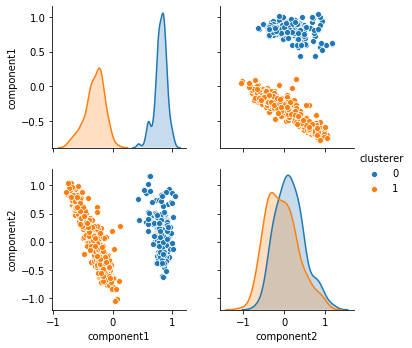

In [ ]:
df['clusterer'] = kmean.predict(data_transform)
sns.pairplot(df,hue='clusterer', vars = ['component{}'.format(i) for i in [1,2]])

# แบบที่ 2 ไม่ทำ PCA

### 1. แปลงข้อมูลให้อยู่ในมาตรฐานเดียวกัน

In [ ]:
# normalize data method2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
StandardScaler = StandardScaler()
MinMaxScaler = MinMaxScaler()
X = data.drop(['cluster'], axis=1)
y = data['cluster']
X = pd.DataFrame(MinMaxScaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


### หา *พารามิเตอร์ที่เหมาะสม*

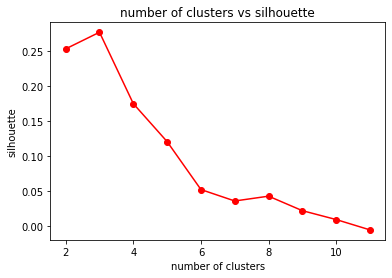

In [ ]:
from sklearn.cluster import KMeans
range_n_clusters = np.arange(2,12)
silhouette = []
#sse = []
cluster_center = {}
wcss = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',max_iter=300, random_state=100)
    clusterer = clusterer.fit(X)
    silhouette.append(silhouette_score(data, clusterer.predict(X)))
    #sse.append(clusterer.inertia_)
    cluster_center.update({'{}'.format(n_clusters):clusterer.cluster_centers_})

plt.title('number of clusters vs silhouette')
plt.xlabel('number of clusters')
plt.ylabel('silhouette')
plt.plot(range_n_clusters, silhouette, 'ro-')
# for xy in zip(range_n_clusters, silhouette):
#     plt.annotate('{:.5}'.format(xy[1]), textcoords='data', xy = xy)
#     #print(xy)
# plt.show() 

# plt.title('number of clusters vs Sum of Square Error')
# plt.xlabel('number of clusters')
# plt.ylabel('Sum of Square Error (SSE)')
# plt.plot(range_n_clusters, sse, 'ro-')
# for xy in zip(range_n_clusters, sse):
#     plt.annotate('{:.5}'.format(xy[1]), textcoords='data', xy = xy)
#     #print(xy)
plt.show()

# 4.Model 

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=2)
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import v_measure_score

clusters = KMeans(n_clusters = 2, init = cluster_center['2'])
clusters.fit(X)
Silhouette = silhouette_score(X, clusters.labels_)
V_Measure = v_measure_score(y, clusters.predict(X))
print('V-measure score is {:>.5f}\nSilhouettee score is {:>.5f}'.format(V_Measure, Silhouette))

V-measure score is 0.04319
Silhouettee score is 0.26184


In [ ]:
clusters.cluster_centers_

array([[0.04548278, 0.06008388, 0.10444173, 0.18270212, 0.39913901,
        0.10567128, 0.04672759, 0.31022472, 0.34219459, 0.19770476,
        0.18146407, 0.60397179, 0.64636462, 0.34116802, 0.27905928,
        0.08051941, 0.44849179],
       [0.08632151, 0.09749031, 0.13836274, 0.44044701, 0.70544182,
        0.12525339, 0.02649792, 0.5981359 , 0.51275933, 0.20924444,
        0.14167259, 0.80796683, 0.87671233, 0.26013625, 0.48212757,
        0.1910198 , 0.62160705]])

# 5.Evaluation and Visaul output

แบบที่ 1

In [ ]:
data['cluster_predict'] = clusters.fit_predict(X)

In [ ]:
dfCluster = data.groupby('cluster_predict', as_index=False).mean()
dfCluster['NO_CUST'] = data[['cluster_predict','cluster']].groupby('cluster_predict').count()

dfCluster

,cluster_predict,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster,NO_CUST
0,0,2264.764948,1649.682474,698.936082,18.356701,45.321649,3468.068041,1021.296907,8345.950515,3950.882474,539.649485,1438.589691,65.377320,73.123711,15.225567,17.859794,7457.313402,58.437113,0.649485,485
1,1,4225.554795,2631.900685,914.571918,42.842466,73.195205,4084.982877,579.582192,13919.910959,5032.945205,565.544521,1177.955479,84.756849,90.630137,12.203082,30.856164,13319.027397,77.133562,0.856164,292


<Figure size 432x288 with 0 Axes>

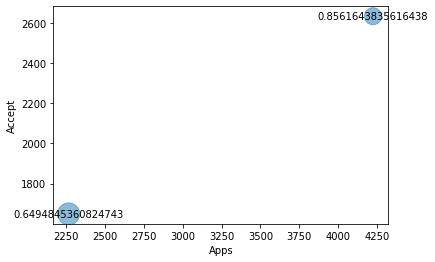

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['Apps'], dfCluster['Accept'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("Apps")
ax.set_ylabel("Accept")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['Apps'][i], dfCluster["Accept"][i]), horizontalalignment='center', verticalalignment='center')

plt.show()

แบบที่ 2

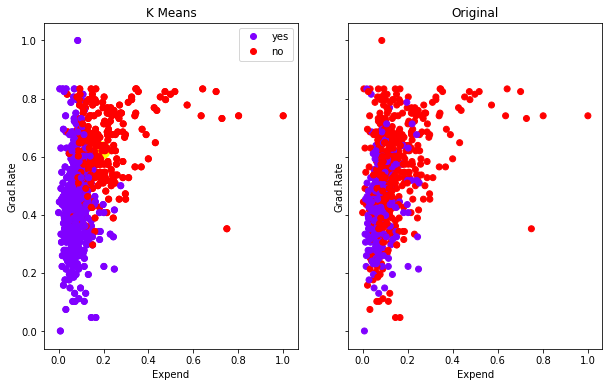

In [ ]:
classes = ['yes', 'no']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.set_xlabel('Expend')
ax1.set_ylabel('Grad.Rate')
ax1.scatter(X[15],X[16],c=clusters.labels_,cmap='rainbow')
ax1.scatter(clusters.cluster_centers_[:,15], clusters.cluster_centers_[:,16], s = 300, c = 'yellow', label = 'Centroids')
ax1.legend(handles=ax1.scatter(X[15],X[16],c=clusters.labels_,cmap='rainbow').legend_elements()[0], labels=classes)

ax2.set_title("Original")
ax2.set_xlabel('Expend')
ax2.set_ylabel('Grad.Rate')
ax2.scatter(X[15],X[16],c=y,cmap='rainbow')
#ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')



# Evaluation model

In [ ]:
Privates = {1: 'yes', 0: 'no'}
data['cluster'] = data['cluster'].map(Privates)

จากการ predict เราไม่ทราบว่าค่าที่ได้จากการ predict 0 คือ class yes หรือ no ฉะนั้นเราจะทำการ plot ตาราง confusion matrix เพื่อดูจำนวน แล้วจะทำการพิจารณา class

In [ ]:
prediction = clusters.labels_

pred_table = pd.DataFrame()
pred_table['y'] = data['cluster']
pred_table['prediction'] = prediction
pred_table.head()

,y,prediction
0,yes,0
1,yes,0
2,yes,0
3,yes,1
4,yes,0


In [ ]:
pred_table['count'] = range(X.shape[0])
pred_table.groupby(['y', 'prediction']).count()

count
y   prediction       
no  0             170
    1              42
yes 0             315
    1             250

จากตาราง confusion matrix พบว่า จำนวนค่าจริงใน class yes และโมเดลทำนายว่า 0 เยอะกว่า 1 แสดงให้เห็นว่า ค่าที่โมเดลทำนาย class 0 คือค่า yes มีขั้นตอนวิธีดังนี้
 

In [ ]:
no_0, no_1, yes_0, yes_1 =pred_table.groupby(['y', 'prediction']).count().values

if(no_0 / no_1 > yes_0 / yes_1) :
    indicator = ['No', 'Yes']
else :
    indicator = ['Yes', 'No']

In [ ]:
pred_table['prediction'] = pred_table['prediction'].apply(lambda x: indicator[x])
pred_table.drop(['count'], axis=1, inplace=True)

pred_table.head()

,y,prediction
0,yes,No
1,yes,No
2,yes,No
3,yes,Yes
4,yes,No


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_table['y'], pred_table['prediction']))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       0.0
         Yes       0.00      0.00      0.00       0.0
          no       0.00      0.00      0.00     212.0
         yes       0.00      0.00      0.00     565.0

    accuracy                           0.00     777.0
   macro avg       0.00      0.00      0.00     777.0
weighted avg       0.00      0.00      0.00     777.0



# The Sand-Box

## 1.Dendogram Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data_Hierarchical = pd.read_csv('/content/drive/My Drive/Programming Machine/K-Mean/college_data.csv')
data_Hierarchical = data_Hierarchical.drop(['Unnamed: 0','Private'], axis =1)
data_Hierarchical.head()




,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
Z = hierarchy.linkage(data_Hierarchical, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z)

## 2.Birch


In [ ]:
from sklearn.cluster import Birch
X = [[2, 1], [-2, 1], [-0.3, 1], [0, -1], [1, -1], [3, -1], [2, -2], [-1, -1], [0.3, -2]]
brc = Birch(n_clusters=4)
brc.fit(X)
ss = silhouette_score(X, brc.predict(X))
brc.predict(X)


array([3, 2, 2, 0, 0, 1, 1, 0, 0])

In [ ]:
print(ss)

0.32182588134759466
